# Abstract
 

Approximately 40 million used vehicles are sold each year. Effective pricing strategies can help any company to efficiently sell its products in a competitive market and making profit. In the automotive sector, pricing analytics play an essential role for both companies and individuals to assess the market price of a vehicle before putting it on sale or buying it. And, the rise of used cars sales is exponentially increasing. Car sellers sometimes take advantage of this scenario by listing unrealistic prices owing to the demand.

Therefore, arises a need for a model that can assign a price for a vehicle by evaluating its features taking the prices of other cars into consideration. In this Notebook, we use supervised learning methods to predict the prices of used cars. The model has been chosen after careful exploratory data analysis to determine the impact of each feature on price. 

So, we propose a methodology using Machine Learning models to predict the prices of used cars given the features. The price is estimated based on the number of features as mentioned above.

Notebook outline:

+ Step 1, we collect the data about used cars, identify important features that reflect the price.
+ Step 2, we preprocess and remove entries with NA values. Discard features that are not relevant for the prediction of the price.
+ Step 3, we apply ML models on the preprocessed dataset with features as inputs and the price as output.

By applying 9 models, the GradientBoostingRegressor gives very encouraging results with 99.1% on training set and 96.2% accuracy on prediction.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


# I. INTRODUCTION

The prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase. Predicting the prices of used cars is an interesting and much-needed problem to be addressed. Customers can be widely exploited by fixing unrealistic prices for the used cars and many falls into this trap. Therefore, rises an absolute necessity of a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Due to the adverse pricing of cars and the nomadic nature of people in developed countries, the cars are mostly bought on a lease basis, where there is an agreement between the buyer and seller. These cars upon completion of the agreement are resold. So reselling has become an essential part of today’s world. 

Given the description of used cars, the prediction of used cars is not an easy task. There are a variety of features of a car like the age of the car, its make, the origin of the car (the original country of the manufacturer), its mileage (the number of mildes it has run) and its horsepower. Due to rising fuel prices, fuel economy is also of prime importance. Other factors such as the type of fuel it uses, style, braking system, the volume of its cylinders (measured in cc), acceleration, the number of doors, safety index, size, weight, height, paint color, consumer reviews, prestigious awards won by the car manufacturer.

Other options such as sound system, air conditioner, power steering, cosmic wheels, GPS navigator all may influence the
price as well.

# II. DATA SET AND PREPROCESSING

We use dataset from Kaggle for used car price prediction. The dataset contains various features that are required to predict and classify the range of prices of used cars.

In [2]:
data = pd.read_csv('../input/used-cars-price-prediction/train-data.csv')
test = pd.read_csv('../input/used-cars-price-prediction/test-data.csv')

Firstly, we imported some basic Libraries.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

And Libraries for ML

In [4]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [5]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

Let's drop the 'New_Price' and 'Unnamed:0' columns.

In [7]:
data = data.drop('New_Price', axis=1)
data = data.drop('Unnamed: 0', axis=1)

test = test.drop('New_Price', axis=1)
test = test.drop('Unnamed: 0', axis=1)

And, drop all NaN data.

In [8]:
data = data.dropna(how='any')
test = test.dropna(how='any')

In [9]:
data.shape

(5975, 12)

In [10]:
test.shape

(1223, 11)

For this dataset ưe found one point very interesting for the Name of the vehicle. We noticed that there weren't any rules for vehicle naming, and duting the prediction step, we reconigned that the names of the vehicles in train_data and test_data are very different and not predictable. We check the following:

In [11]:
listtrain = data['Name']
listtest = test['Name']
  
# prints the missing in listrain 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'Fiat Abarth 595 Competizione', 'Mahindra KUV 100 mFALCON D75 K2', 'Honda CR-V Diesel', 'Fiat Grande Punto 1.2 Emotion', 'Ford Fiesta Classic 1.6 Duratec LXI', 'Hyundai i20 Active SX Diesel', 'Mercedes-Benz B Class B180 Sport', 'Audi Q5 2008-2012 3.0 TDI Quattro', 'Hyundai i20 1.4 Asta AT (O) with Sunroof', 'Mahindra KUV 100 mFALCON D75 K6 5str AW', 'Mahindra KUV 100 D75 K8 5Str', 'Ford EcoSport 1.5 Petrol Ambiente', 'Hyundai Creta 1.6 VTVT Base', 'Mahindra Scorpio SLX 2.6 Turbo 8 Str', 'Nissan Teana XL', 'Skoda Octavia 2.0 TDI MT Style', 'Chevrolet Enjoy Petrol LTZ 7 Seater', 'Fiat Avventura FIRE Dynamic', 'Hyundai Verna 1.4 CX', 'Mahindra KUV 100 G80 K4 Plus 5Str', 'Skoda Laura 1.9 TDI MT Elegance', 'Hyundai Santro Xing XG AT eRLX Euro III', 'Honda Civic 2010-2013 1.8 S MT Inspire', 'Hyundai Elantra GT', 'Maruti Ertiga VXI Petrol', 'Bentley Flying Spur W12', 'Volkswagen Vento 1.2 TSI Comfortline AT', 'Maruti Ciaz VXi', 'Volvo S60 D5 Kinetic', 'Land Rove

Therefore, we decided to create a new column under the name "Cars" to distinguish the car make & model. We have noticed that some authors have used the coding of vehicle names by specifying each vehicle as a separate code and conducting train and prediction, which is probably not LOGICAL.

In [12]:
data['Cars'] = data['Name'].str.split(" ").str[0] + ' ' +data['Name'].str.split(" ").str[1]
test['Cars'] = test['Name'].str.split(" ").str[0] + ' ' +test['Name'].str.split(" ").str[1]

In [13]:
set(test['Cars']).issubset(set(data['Cars']))

False

Now, check again, and efectively, there are only 7 cars in the test data set are missing from the train data set. Fine, we drop these items.

In [14]:
listtrain = data['Cars']
listtest = test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'Isuzu MU', 'Nissan 370Z', 'Fiat Abarth', 'Toyota Land', 'Bentley Flying', 'OpelCorsa 1.4Gsi', 'Hindustan Motors'}


In [15]:
test.drop(test[test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z', 
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [16]:
test.shape

(1216, 12)

In [17]:
listtrain = data['Cars']
listtest = test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: set()


In [18]:
data.head(3)

Name Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option     Pune  2015              41000   
2                      Honda Jazz V  Chennai  2011              46000   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   

   Price           Cars  
0   1.75   Maruti Wagon  
1  12.50  Hyundai Creta  
2   4.50     Honda Jazz

Now, we will convert all data of columns "Mileage", "Engine", "Power", "Seats" into float.

In [19]:
data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine'] = data['Engine'].str.replace(' CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace(' bhp','')

test['Mileage'] = test['Mileage'].str.replace(' kmpl','')
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Power'] = test['Power'].str.replace('null bhp','112')
test['Power'] = test['Power'].str.replace(' bhp','')

In [20]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [21]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [22]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Cars                  object
dtype: object

In [23]:
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

test['Mileage'] = test['Mileage'].astype(float)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test['Power'] = test['Power'].astype(float)

In [24]:
data.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  5975.000000       5.975000e+03  5975.000000  5975.000000  5975.000000   
mean   2013.386778       5.867431e+04    18.179408  1621.606695   113.254882   
std       3.247238       9.155851e+04     4.521801   601.036987    53.415632   
min    1998.000000       1.710000e+02     0.000000   624.000000    34.200000   
25%    2012.000000       3.390800e+04    15.200000  1198.000000    77.000000   
50%    2014.000000       5.300000e+04    18.160000  1493.000000    98.600000   
75%    2016.000000       7.300000e+04    21.100000  1984.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   560.000000   

             Seats        Price  
count  5975.000000  5975.000000  
mean      5.278828     9.501647  
std       0.808959    11.205736  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.650000  
75%       5.000000     9.950000  
max      10.000000   160.000000

In [25]:
feature = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
data = pd.DataFrame(data, columns=feature)

feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
test = pd.DataFrame(test, columns=feature1)

# III. EXPLORATORY DATA ANALYSIS

After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that
can be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box
plot, distribution graph, etc. to explore each feature varies and its relation with other features including the target
feature.

In [26]:
data.head(3)

Cars Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti Wagon   Mumbai  2010              72000       CNG       Manual   
1  Hyundai Creta     Pune  2015              41000    Diesel       Manual   
2     Honda Jazz  Chennai  2011              46000    Petrol       Manual   

  Owner_Type  Mileage  Engine   Power  Seats  Price  
0      First    26.60   998.0   58.16    5.0   1.75  
1      First    19.67  1582.0  126.20    5.0  12.50  
2      First    18.20  1199.0   88.70    5.0   4.50

Now, let's check the Price first.

Skewness: 3.334741
Kurtosis: 17.073183


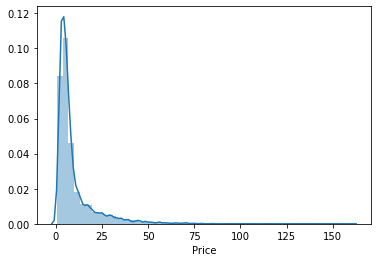

In [27]:
sns.distplot(data['Price'])

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 17 is very high, meaning that there is a profusion of outliers in the dataset.

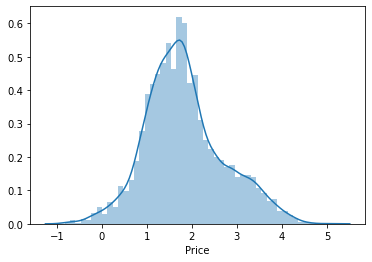

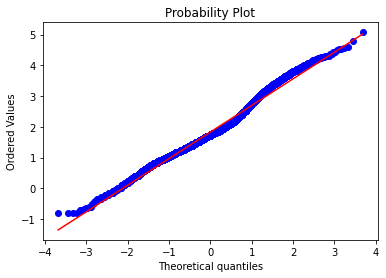

In [28]:
#applying log transformation
data['Price'] = np.log(data['Price'])
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(data['Price'], fit=None);
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

We found that converting the value of Price to Log(Price) might be a good solution to have a more normal visualization of the distribution of the Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations and conduct the modeling in the following section.

# RELATIONSHIP OF PRICE WITH OTHER PARAMETER

In [29]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")
corr = data.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                1.000000
Power                0.755995
Engine               0.687712
Year                 0.503999
Seats                0.163818
Kilometers_Driven   -0.047187
Mileage             -0.265965
Name: Price, dtype: float64


In [30]:
px.treemap(data.groupby(by='Fuel_Type').sum().reset_index(), path=['Fuel_Type'], labels='Fuel_Type', 
           values='Price', title='Price vs Fuel_type')

Wow, Diesel vehicles are the majority, NOT petrole cars.

In [31]:
yprop = 'Price'
xprop = 'Power'
h= 'Fuel_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [32]:
yprop = 'Price'
xprop = 'Engine'
h= 'Transmission'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

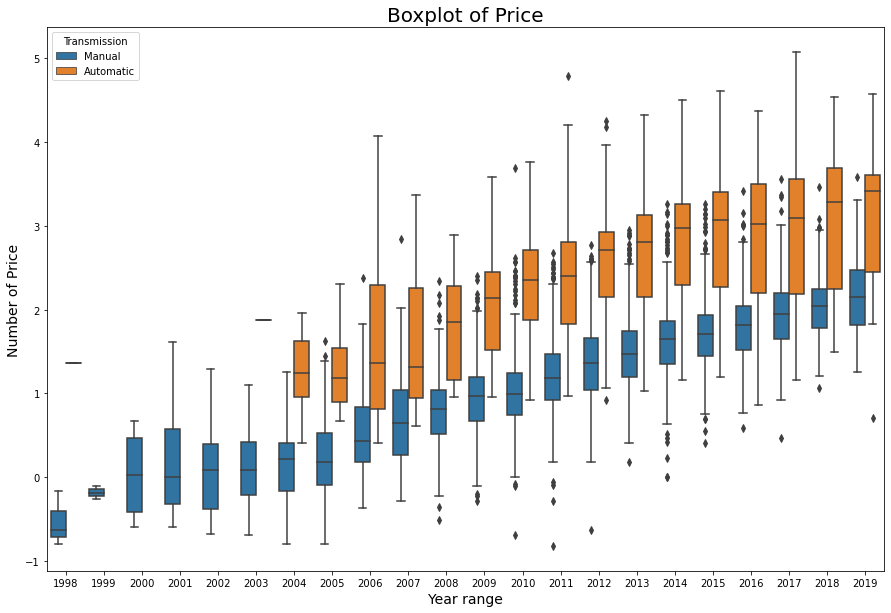

In [33]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

Yeah ! "New" cars are more expensive than "Old" cars, and Automatic cars are more costly.

In [34]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
#fig.update_layout(xaxis_range=[0,5e5])

It's quite BIZZA that, the THIRD OWNER' CARS are sometime more expensive than the second-hand :)

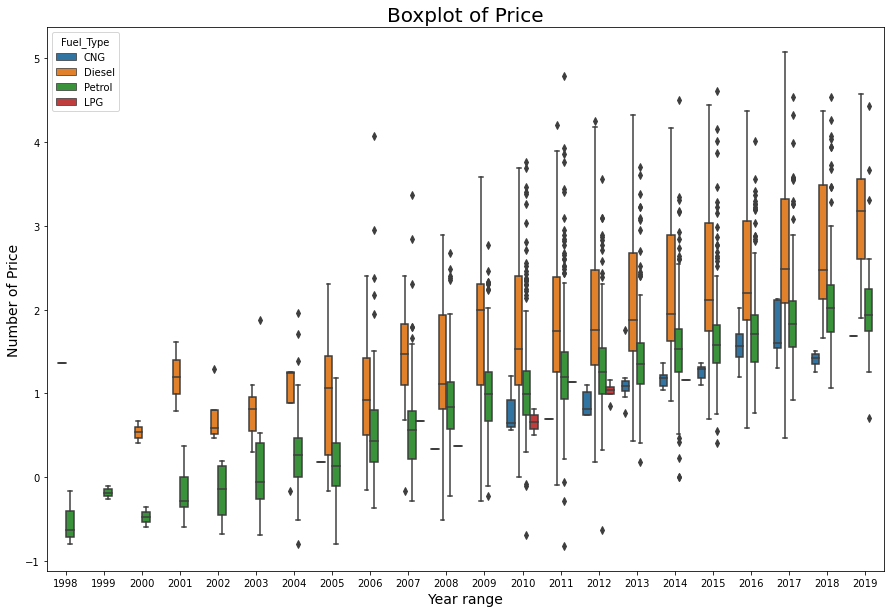

In [35]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [36]:
fig = px.box(data, x='Fuel_Type',y='Price', color='Transmission', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

Again, this confirmed that the Petrol vehicle is cheaper than the Diesel.

In [37]:
px.violin(data, y='Price', x='Seats', color=None, box=True, points="all", hover_data=data.columns)

In [38]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Fuel_Type'], values=data['Price'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

# IV. MODEL DESCRIPTION

To compute the price for vehicles, this platform may compute linear regression model that defines a set of input variables. However, it does not give details as what features can be used for specific type of vehicles for such prediction. We have taken important features for predicting the price of used cars using random forest models.

Zhang et al. [2] use Kaggle data-set to perform price prediction of a used car. The author evaluates the performance
of several classification methods (logistic regression, SVM, decision tree, Extra Trees, AdaBoost, random forest) to assess
the performance. Among all these models, random forest classifier proves to perform the best for their prediction task.

This work uses eleven (11) features ('Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats') to perform the classification task after removal of irrelevant features from the dataset which gives an accuracy of 96.2% on the test data. We also use Kaggle data-set to perform prediction of used-car prices. 

Work by Durgesh et al. [4] gives a good introductory paper on Support Vector Machine. The authors assess the performance of several classification techniques (K-NN, RuleBased Classifiers, etc.) by performing the comparative assessment of SVM with others. This comparative study is done using several data-sets taken from the UCI Machine Learning Repository. This assessment yields that SVM gives much better classification accuracy in comparison to others.

The Author of the paper [5] predicts the price of used cars in Mauritius by using four comparable machine learning algorithms - multiple linear regression, k-nearest neighbors, naive Bayes and decision trees algorithm. The author uses historical data collected from daily newspapers in Mauritius. The application of listed learning algorithms on this data provides comparable results with not-so-good prediction accuracy. The main difference, however, between classifying price range and spam mail, is that spam email classification task is a binary one, whereas our motive is mainly one-vs-therest.

**A. Data preparation & Model Parameters**

In this Notebook, we do not discuss in deep about the Models' parameters, we just applied the standard or refer to previous recommendations. Let's copy the database.

In [39]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

And then, coding the categorical parameters using LabelEncoder.

In [40]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [41]:
df_test.head(2)

Cars  Location  Fuel_Type  Transmission  Owner_Type  Year  \
0   106         4          0             1           0  2014   
1   106         3          3             1           2  2013   

   Kilometers_Driven  Mileage  Engine  Power  Seats  
0              40929    32.26   998.0   58.2    4.0  
1              54493    24.70   796.0   47.3    5.0

In [42]:
df_train.head(2)

Cars  Location  Fuel_Type  Transmission  Owner_Type  Year  \
0   124         9          0             1           0  2010   
1    65        10          1             1           0  2015   

   Kilometers_Driven  Mileage  Engine   Power  Seats     Price  
0              72000    26.60   998.0   58.16    5.0  0.559616  
1              41000    19.67  1582.0  126.20    5.0  2.525729

**B. Training and Testing**

We split our dataset into training, testing data with a 70:30 split ratio. The splitting was done by picking at random which results in a balance between the training data and testing data amongst the whole dataset. This is done to avoid overfitting and enhance generalization. Finaly, we selected 11 characters in the dataset to train the model.

In [43]:
ftrain = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
          'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

Now, we create different functions to calculate deviations, important features and graphical illustration.

In [44]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

Firstly, take a quick look at the correlation matrix.

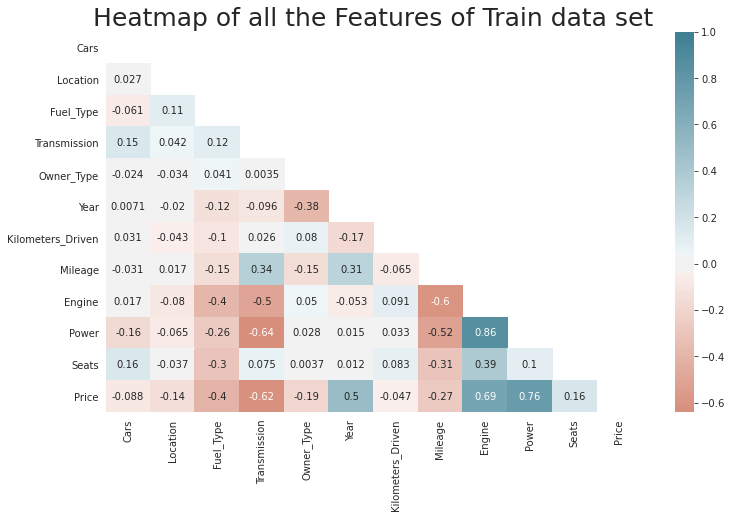

In [45]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

**C. Models comparison**

The model score is the coefficient of determination R2 of the prediction. In total, we have examinated 9 models to train/predict the used cars price.

In [46]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [47]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [48]:
Acc.sort_values(by='Accuracy on Testing set')

model  Root Mean Squared  Error  Accuracy on Traing set  \
3           MLPRegressor                205.550645                0.689850   
4      AdaBoostRegressor                148.177027                0.832878   
0  DecisionTreeRegressor                115.421645                0.999993   
2  RandomForestRegressor                 84.069592                0.991793   
5    ExtraTreesRegressor                 80.262533                0.999993   
1           XGBRegressor                 74.815814                0.994635   

   Accuracy on Testing set  
3                 0.648143  
4                 0.817152  
0                 0.889056  
2                 0.941142  
5                 0.946352  
1                 0.953386

		Error Table
Mean Absolute Error      :  56.03390206528867
Mean Squared  Error      :  6245.97435856826
Root Mean Squared  Error :  79.03147701117739
Accuracy on Traing set   :  0.9926365515910403
Accuracy on Testing set  :  0.9479849644700832


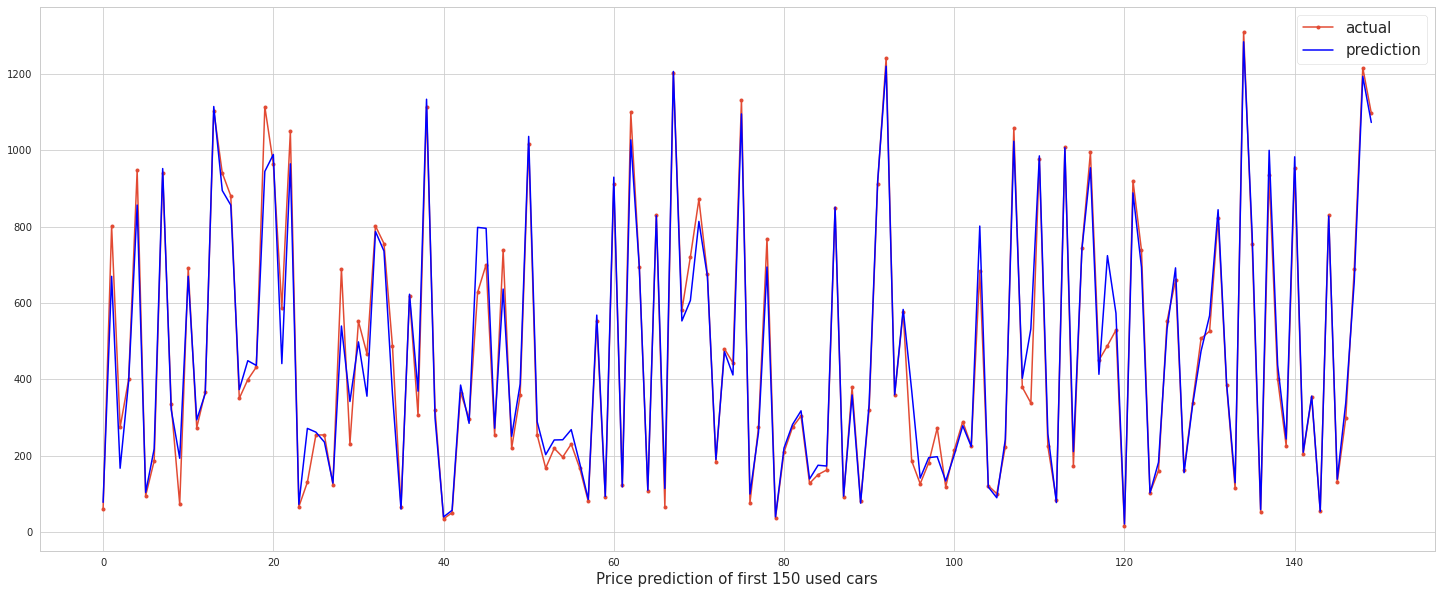

In [49]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  47.05285207381301
Mean Squared  Error      :  4775.906080512007
Root Mean Squared  Error :  69.10793066292759
Accuracy on Traing set   :  0.9947381034525249
Accuracy on Testing set  :  0.9602273544199561


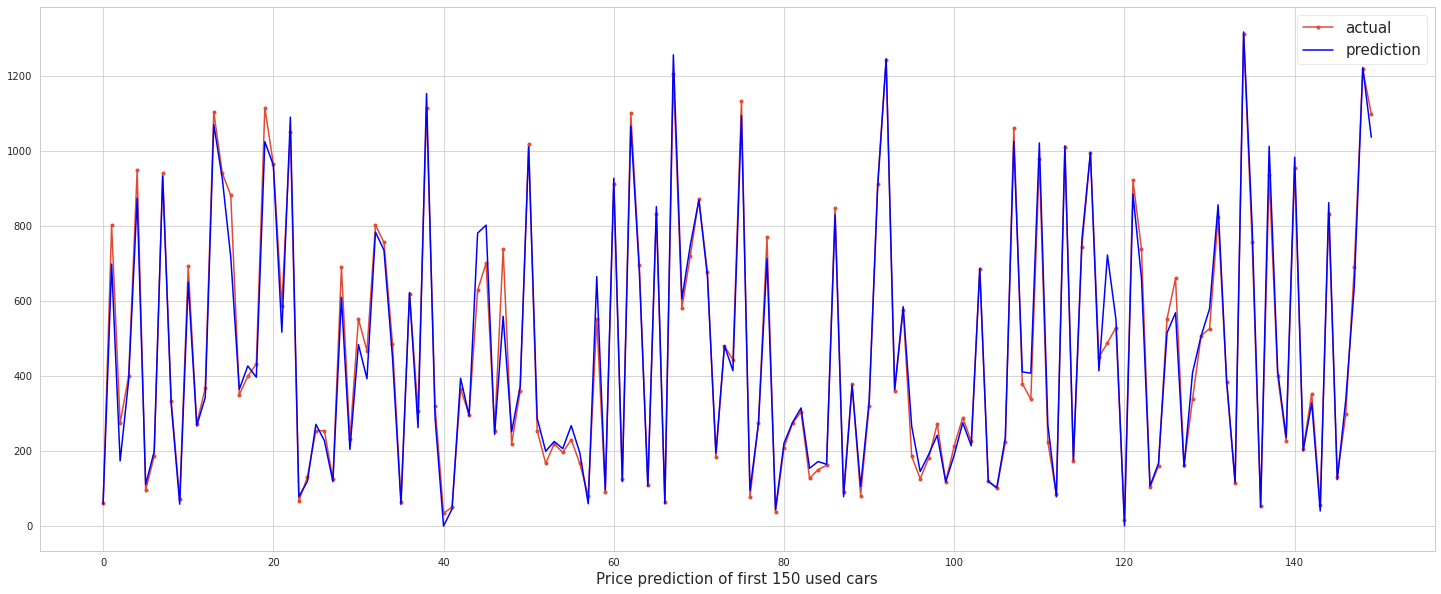

In [50]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=3000))
Graph_prediction(150, y_actual, y_predicted)

In [51]:
y_predicted, y_actual = Models(CatBoostRegressor(iterations= 10000, learning_rate= 0.02, random_state= 60))

0:	learn: 345.6209555	total: 53.6ms	remaining: 8m 55s
1:	learn: 340.5798029	total: 56.8ms	remaining: 4m 43s
2:	learn: 335.4172116	total: 59.5ms	remaining: 3m 18s
3:	learn: 330.4256615	total: 62.7ms	remaining: 2m 36s
4:	learn: 325.3055417	total: 66.3ms	remaining: 2m 12s
5:	learn: 320.2643598	total: 69.6ms	remaining: 1m 55s
6:	learn: 315.4987069	total: 72.8ms	remaining: 1m 43s
7:	learn: 310.9374902	total: 75.3ms	remaining: 1m 34s
8:	learn: 306.3487714	total: 78.6ms	remaining: 1m 27s
9:	learn: 301.8586451	total: 81.7ms	remaining: 1m 21s
10:	learn: 297.4062292	total: 84.3ms	remaining: 1m 16s
11:	learn: 293.1492281	total: 86.4ms	remaining: 1m 11s
12:	learn: 288.9032681	total: 89ms	remaining: 1m 8s
13:	learn: 284.6983842	total: 92.1ms	remaining: 1m 5s
14:	learn: 280.7840875	total: 95.7ms	remaining: 1m 3s
15:	learn: 276.8911780	total: 98.8ms	remaining: 1m 1s
16:	learn: 272.8694885	total: 102ms	remaining: 59.8s
17:	learn: 269.0154973	total: 104ms	remaining: 57.7s
18:	learn: 265.4211213	total: 

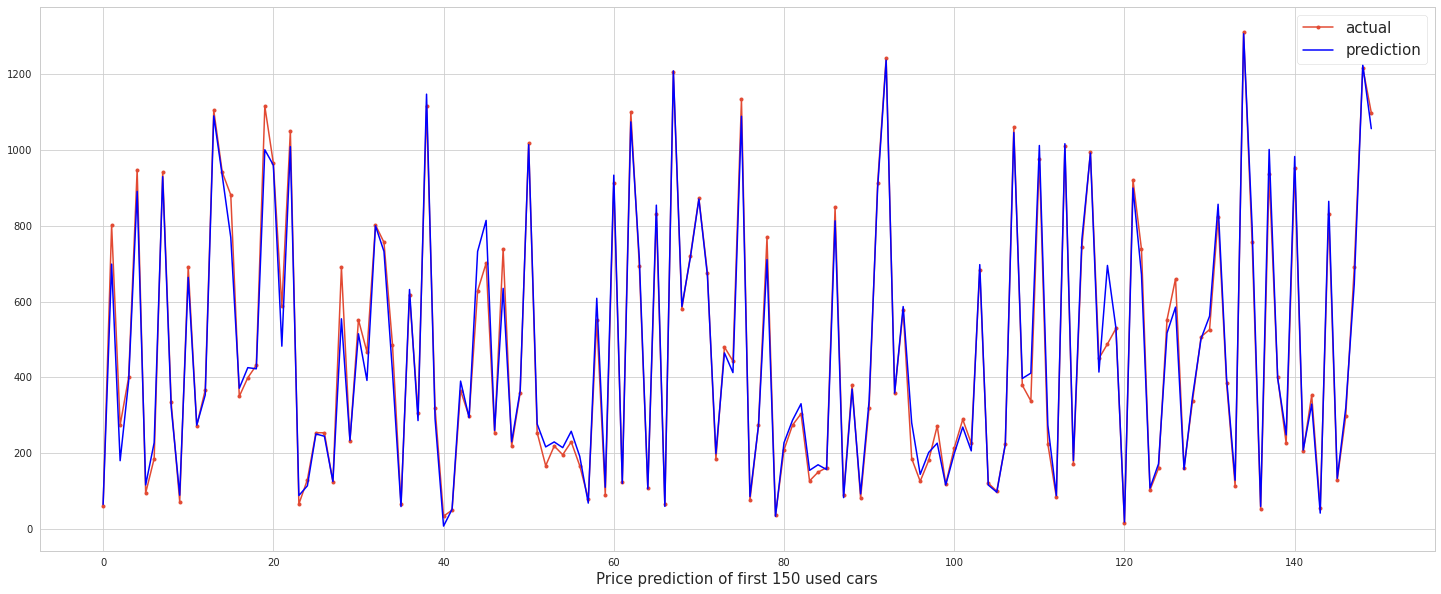

In [52]:
Graph_prediction(150, y_actual, y_predicted)

In [53]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

Prediction  Test Data   Abs error       AAD%
0   64.987943         60    4.987943   8.313238
1  698.647158        802  103.352842  12.886888
2  180.308369        274   93.691631  34.194026
3  390.045724        400    9.954276   2.488569
4  890.317846        948   57.682154   6.084615
5  116.382825         95   21.382825  22.508237
6  227.781281        186   41.781281  22.463054
7  929.365739        941   11.634261   1.236372
8  320.976607        334   13.023393   3.899220
9   89.281981         72   17.281981  24.002752

In [54]:
model = GradientBoostingRegressor(random_state=21, n_estimators=5000)
feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

X0 = df_test[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(X0)

submission = pd.DataFrame({'Car_id':test.index,'Price':y_predicted}) 
submission.head(10)

Car_id        Price
0       0   229.220688
1       1   157.300412
2       2   933.110908
3       3   237.274792
4       4   273.766839
5       5   758.443125
6       6  1032.597871
7       7   122.656552
8       8   166.785100
9       9   751.605876

In [55]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saved file: submission.csv


# V. CONCLUSION

This Notebook evaluates used-car price prediction using Kaggle dataset which gives the best accuracy of 96.2% for test data and
99.1% for train-data. Being a sophisticated model, GradientBoostingRegressor gives the BEST accuracy in comparison to all prior works using these datasets.

# VI. FUTURE WORKS

Keeping the current model as a baseline, we intend to use some advanced techniques algorithms to predict car prices as our future work. We intend to develop a fully automatic, interactive system that contains a repository of used-cars with their prices. This enables a user to know the price of a similar car using a recommendation engine, which we would work in the future.

# VII. REFERENCES

[1] Strauss, Oliver Thomas, and Morgan Scott Hansen. "Advanced data science systems and methods useful for auction pricing optimization over network." U.S. Patent Application No. 15/213,941.

[2] Xinyuan Zhang , Zhiye Zhang and Changtong Qiu, “Model of Predicting the Price Range of Used Car”, 2017

[3] W.A. Awad and S.M. ELseuofi, “Machine Learning Method for SpamEmail Classification”, 2011

[4] Durgesh K. Srivastava, Lekha Bhambhu, “Data Classification Method using Support Vector Machine”, 2009

[5] Pudaruth, Sameerchand. "Predicting the price of used cars using machine learning techniques." Int. J. Inf. Comput. Technol 4.7 (2014): 753-764.

[6] Noor, Kanwal, and Sadaqat Jan. "Vehicle Price Prediction System using Machine Learning Techniques." International Journal of Computer Applications 167.9 (2017).

[7] Kuiper, Shonda. "Introduction to Multiple Regression: How Much Is Your Car Worth?." Journal of Statistics Education 16.3 (2008).